<a href="https://colab.research.google.com/github/vvillbiii/business-data-analytics-and-intelligence-colab-notebooks/blob/main/Linear_Regression_Will.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libaries and Data 

In [ ]:
%cd /content/drive/MyDrive/1 Projects/Business Analyst course/Statistics and Descriptive Analytics/Linear Regression

/content/drive/MyDrive/1 Projects/Business Analyst course/Statistics and Descriptive Analytics/Linear Regression


In [ ]:
import statsmodels.api as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('diamond.csv')
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


# data preparation

In [ ]:
# data preparation
y = df.price
x = df.carat

In [ ]:
# adding constant
x = st.add_constant(x)
x.head()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,carat
0,1.0,0.30
1,1.0,0.30
2,1.0,0.30
3,1.0,0.30
4,1.0,0.31


# Linear Regression

In [ ]:
# model 1 
model1 = st.OLS(endog= y, exog=x).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          3.04e-150
Time:                        04:25:10   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.3576    158.531    -14.498      0.0

Text(0, 0.5, 'Price')

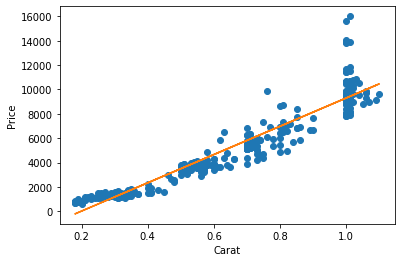

In [ ]:
# plotting
x = df.carat
plt.plot(x, y, 'o')
b, a = np.polyfit(x, y, 1)
plt.plot(x, b * x + a)
plt.xlabel("Carat")
plt.ylabel("Price")

# Linear Regression with Dummy Variable 

In [ ]:
# describe
df.carat.describe()

count    308.000000
mean       0.630909
std        0.277183
min        0.180000
25%        0.350000
50%        0.620000
75%        0.850000
max        1.100000
Name: carat, dtype: float64

In [ ]:
# variable 
df['carat_binary'] = np.where(df.carat > 0.6, 1, 0)
df.tail()

,Unnamed: 0,carat,colour,clarity,certification,price,carat-binary,carat_binary
303,304,1.01,I,VS1,HRD,8175,1,1
304,305,1.02,F,VVS2,HRD,10796,1,1
305,306,1.06,H,VVS2,HRD,9890,1,1
306,307,1.02,H,VS2,HRD,8959,1,1
307,308,1.09,I,VVS2,HRD,9107,1,1


In [ ]:
# create linear regression with variable 
X = df.carat_binary
Y = df.price

In [ ]:
X = st.add_constant(X)
X.head()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,carat_binary
0,1.0,0
1,1.0,0
2,1.0,0
3,1.0,0
4,1.0,0


In [ ]:
model2 = st.OLS(endog= y, exog= X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     591.5
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           1.79e-73
Time:                        04:48:49   Log-Likelihood:                -2775.6
No. Observations:                 308   AIC:                             5555.
Df Residuals:                     306   BIC:                             5563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2225.2303    161.442     13.783   

Text(0, 0.5, 'Price')

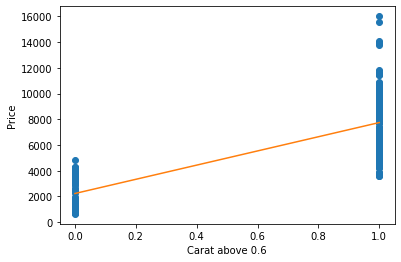

In [ ]:
# ploting 
X = df.carat_binary
plt.plot(X, y, 'o')
b, a = np.polyfit(X, y,1)
plt.plot(X, b * X + a)
plt.xlabel("Carat above 0.6")
plt.ylabel("Price")